In [119]:
import pandas as pd 
data = pd.read_csv("dpp_comparison.csv") 
data.loc[(data.agent == 'agent_drl_honest'),'agent']='Truthful'
data.loc[(data.agent == 'agent_drl_mid'),'agent']='Indiff'
data.loc[(data.agent == 'agent_drl_mid_optimised'),'agent']='Indiff-rational-pruned'
data.loc[(data.agent == 'agent_drl_mid_optimized'),'agent']='Indiff-pruned'
data.loc[(data.agent == 'agent_drl_policy'),'agent']='Policy'
data.loc[(data.agent == 'agent_drl_org'),'agent']='Ambiguity'
data.loc[(data.agent == 'agent_ds1'),'agent']='πd1'
data.loc[(data.agent == 'agent_ds2'),'agent']='πd2'
data.loc[(data.agent == 'agent_ds3'),'agent']='πd3'
data.loc[(data.agent == 'agent_ds4'),'agent']='πd4'

In [120]:
data.head()

,map,agent,start,optcost,density,distribution,formula,goal0,costdif,cost,...,cost.3,probability.3,goal4,costdif.4,cost.4,probability.4,goal5,costdif.5,cost.5,probability.5
0,arena2,Truthful,"(20, 41)",44.28,10,P,3,"(40, 5)",797.172,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,arena2,Truthful,"(20, 41)",44.28,20,P,3,"(40, 5)",792.344,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,arena2,Truthful,"(20, 41)",44.28,30,P,3,"(40, 5)",786.688,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,arena2,Truthful,"(20, 41)",44.28,40,P,3,"(40, 5)",782.446,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,arena2,Truthful,"(20, 41)",44.28,50,P,3,"(40, 5)",777.618,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
avgdata = data.groupby(['agent', 'density'], as_index=False).mean()
avgdata = avgdata[avgdata['density']!=100] #exclude 
avgdata = avgdata[avgdata['agent']!='πd1'] #exclude 
avgdata = avgdata[avgdata['agent']!='πd2'] #exclude 
avgdata = avgdata[avgdata['agent']!='πd3'] #exclude 

In [131]:
avgdata.head()

,agent,density,optcost,formula,costdif,cost,probability,costdif.1,cost.1,probability.1,...,cost.3,probability.3,goal4,costdif.4,cost.4,probability.4,goal5,costdif.5,cost.5,probability.5
0,Ambiguity,10,40.379353,3,796.865882,51.745765,0.340882,797.282882,51.745765,0.327353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ambiguity,20,40.379353,3,792.600824,51.745765,0.354706,793.954118,51.745765,0.312353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ambiguity,30,40.379353,3,788.707059,51.745765,0.386471,792.174235,51.745765,0.285000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ambiguity,40,40.379353,3,784.338765,51.745765,0.430000,791.095176,51.745765,0.247647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ambiguity,50,40.379353,3,780.247353,51.745765,0.467647,790.586000,51.745765,0.216471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
plotdata = avgdata[['agent', 'density', 'probability','cost']]
plotdata.head()

,agent,density,probability,cost
0,Ambiguity,10,0.340882,51.745765
1,Ambiguity,20,0.354706,51.745765
2,Ambiguity,30,0.386471,51.745765
3,Ambiguity,40,0.430000,51.745765
4,Ambiguity,50,0.467647,51.745765


In [133]:
import matplotlib.pyplot as plt
import numpy as np

In [134]:
import matplotlib.pyplot as plt

print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


Ambiguity
Indiff
Indiff-pruned
Policy
Truthful
πd4


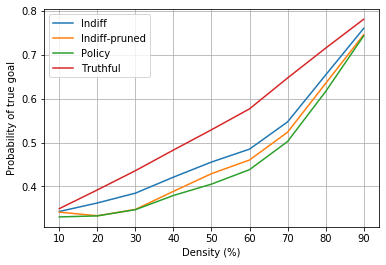

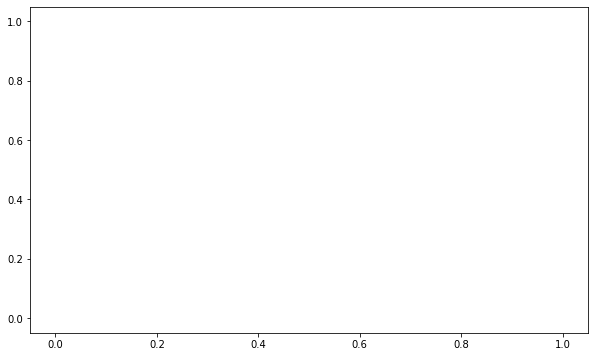

In [147]:
x = np.arange(10, 100, 10)
#print(x)
for agent in plotdata['agent'].unique():
    print(agent)
    if agent in ["Indiff-rational-pruned","Indiff","Indiff-pruned","Policy","Truthful"]:
        y = np.asarray(plotdata[plotdata['agent']==agent]['probability'])
        plt.plot(x, y, label=agent)
    
plt.legend()
plt.xlabel('Density (%)')
plt.ylabel('Probability of true goal')
#
plt.grid(True)
plt.savefig('ourmodels_prob_per_density.jpg')
plt.figure(figsize=(10,6))
plt.plot()
plt.show()

In [136]:
costdata = plotdata[plotdata['density']==10][['agent','cost']]
costdata = costdata.sort_values(by=['cost'])

In [137]:
y = np.asarray(costdata['cost'])
n = (costdata[costdata['agent']=='Truthful']['cost']).iat[0]
y = np.true_divide(y, n)
print(y)

[1.         1.11493643 1.13975401 1.16605458 1.28149069 1.37917748]


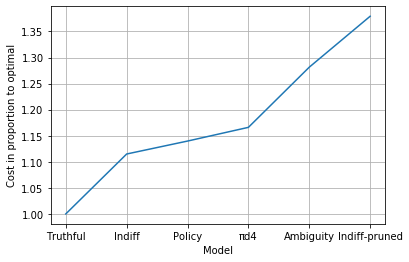

<Figure size 864x432 with 0 Axes>

In [138]:
x = np.asarray(costdata['agent'])
y = np.asarray(costdata['cost'])
oc = (costdata[costdata['agent']=='Truthful']['cost']).iat[0]
y = np.true_divide(y, oc)
costdata['costproprtion']=y
plt.plot(x, y, label=agent)
    
#plt.legend()
plt.xlabel('Model')
plt.ylabel('Cost in proportion to optimal')
#plt.rcParams['xtick.labelsize'] = '10'
#
plt.grid(True)
plt.savefig('cost_proportion.jpg')
plt.figure(figsize=(12,6))
#plt.plot()
plt.show()

In [138]:
costdata

,agent,cost,costproprtion
0,Truthful,43.624,1.000000
10,agent_drl_policy-lamda:0.1-w:2,48.592,1.113882
20,agent_drl_policy-lamda:0.1-w:3,48.592,1.113882
30,agent_drl_policy-lamda:0.1-w:4,49.420,1.132863
40,agent_drl_policy-lamda:0.1-w:5,49.420,1.132863
50,agent_drl_policy-lamda:0.1-w:6,49.420,1.132863
60,agent_drl_policy-lamda:0.3-w:2,49.420,1.132863
180,agent_drl_policy-lamda:1.5-w:4,50.248,1.151843
170,agent_drl_policy-lamda:1.5-w:3,50.248,1.151843
160,agent_drl_policy-lamda:1.5-w:2,50.248,1.151843


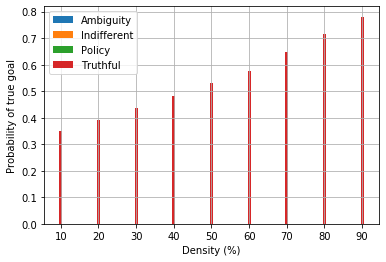

In [14]:
for agent in plotdata['agent'].unique():
    y = np.asarray(plotdata[plotdata['agent']==agent]['probability'])
    plt.bar(x, y, label=agent)
    
plt.legend()
plt.xlabel('Density (%)')
plt.ylabel('Probability of true goal')

plt.grid(True)
plt.show()